# Focus stacking with image bunches

Example of focus stacking with automatic alignment and luminosity balance, and partial stacking of image bunches before the final stacking.

In [1]:
from focus_stack import *

In [2]:
def make_job(x, y):
    job = StackJob("job", x + y, input_path="src")
    job.add_action(MultiRefActions("align", actions=[AlignLayers(),
                                                     Balance(LumiCorrection(i_min=125, i_max=65385, mask_size=0.8))]))
    job.add_action(FocusStackBunch("bunches", PyramidStack(), exif_path="src", frames=13, overlap=2, denoise=0))
    job.add_action(FocusStack("stack", PyramidStack(), exif_path="src", postfix='_pyr', denoise=0))
    job.add_action(MultiLayer("multilayer", input_path=['bunches', 'stack']))
    return job

88 files in folder: 'E:/Focus stacking/2025-04-21 - Hemiptera/J/src'


align:   0%|          | 0/88 [00:00<?, ?it/s]

running align: step 88/88: process file: _MG_9376.tif, reference: _MG_9377.tif - write image        

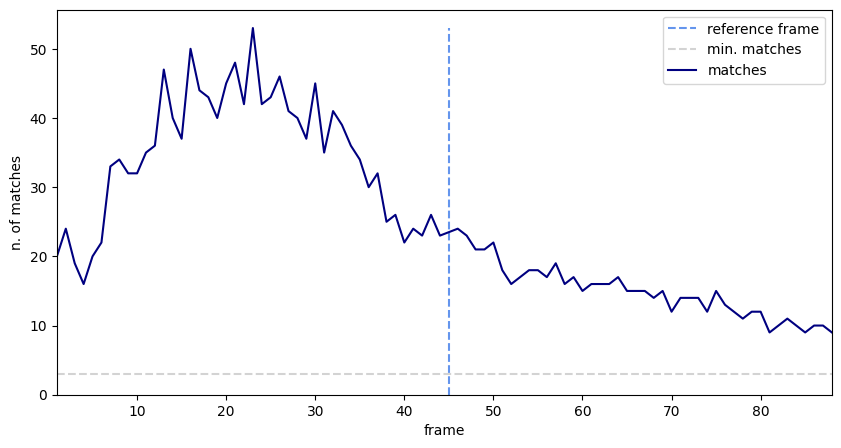

running align:                                                                                  


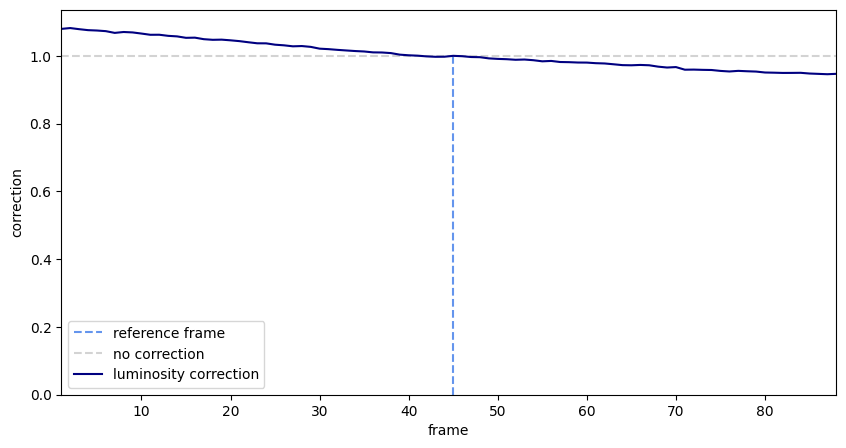

align: elapsed time: 00:10:47.79s                    
align completed                    
running bunches

bunches:   0%|          | 0/8 [00:00<?, ?it/s]

bunches: elapsed time: 00:15:23.11s                    leted                      
bunches completed                    
running stack
8 files in folder: 'E:/Focus stacking/2025-04-21 - Hemiptera/J/bunches'
stack: elapsed time: 00:00:50.50s                    
stack completed                    
multilayer: merging frames in folders: E:/Focus stacking/2025-04-21 - Hemiptera/J/bunches, E:/Focus stacking/2025-04-21 - Hemiptera/J/stack
multilayer: frames: _MG_9376.tif, _MG_9387.tif, _MG_9398.tif, _MG_9409.tif, _MG_9420.tif, _MG_9431.tif, _MG_9442.tif, _MG_9453.tif, _MG_9376_pyr.tif
multilayer: reading files
multilayer: writing multilayer tiff multilayer/_MG_9376_pyr.tif
job: elapsed time: 00:28:06.58s                    
job completed                    


In [3]:
for x in ["E:/Focus stacking/2025-04-21 - Hemiptera/"]:
    for y in ['J']:
        make_job(x, y).run()